# Imports

Making import from numpy and tensorflow

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Dataset init

In [191]:
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

# Findind data quantity and classes

Here info of **X_train.shape** is ```(number of samples, height, width, color channels)```

In [192]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_train[0])

(50000, 32, 32, 3)
[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]
(10000, 32, 32, 3)
[19]


# Plotting samples

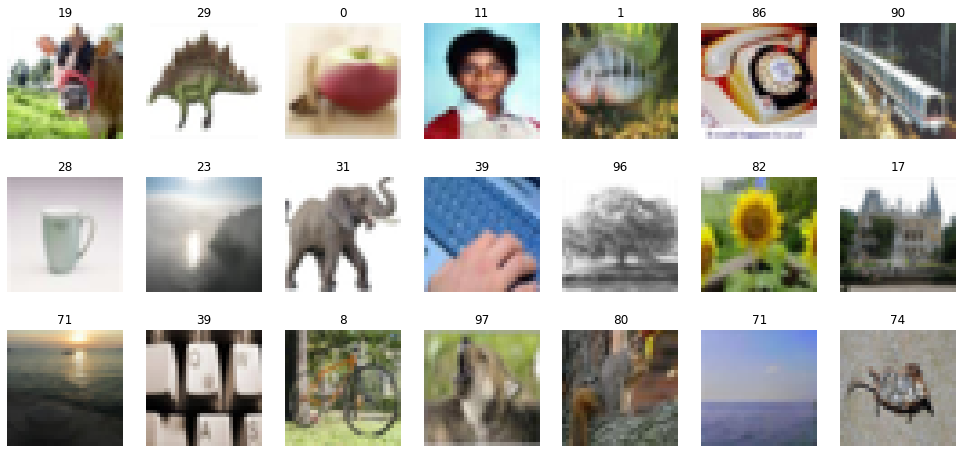

In [193]:
cols = 7
num_classes = 3
fig, axes = plt.subplots(ncols=cols, nrows=num_classes, figsize=(17, 8))
index = 0
for i in range(num_classes):
    for j in range(cols):
        axes[i,j].set_title(Y_train[index][0])
        axes[i,j].imshow(X_train[index])
        axes[i,j].axis("off")
        index += 1

# Converting to grayscale

In [194]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [195]:
print(X_train[0])

[[255 255 255 ... 200 217 185]
 [255 254 254 ... 168 156 141]
 [255 254 255 ... 189 162 118]
 ...
 [149 140 139 ...  14  48  60]
 [126 122 130 ...  13  94 137]
 [ 94  93 107 ...  28 108 141]]


# Normalising

In [196]:
X_train = X_train/255
X_test = X_test/255

In [197]:
print(X_train[0])

[[1.         1.         1.         ... 0.78431373 0.85098039 0.7254902 ]
 [1.         0.99607843 0.99607843 ... 0.65882353 0.61176471 0.55294118]
 [1.         0.99607843 1.         ... 0.74117647 0.63529412 0.4627451 ]
 ...
 [0.58431373 0.54901961 0.54509804 ... 0.05490196 0.18823529 0.23529412]
 [0.49411765 0.47843137 0.50980392 ... 0.05098039 0.36862745 0.5372549 ]
 [0.36862745 0.36470588 0.41960784 ... 0.10980392 0.42352941 0.55294118]]


# Vector

32 x 32 = 1024 length

In [200]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Layering

Creating the layers of neural network.

In [204]:
def create_model() -> Sequential:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating Model

Output summary is given

In [205]:
model = create_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 16)        9232      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)      

# Training of the model

Training model with 20 epochs

In [207]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.20)

Epoch 1/20


ValueError: in user code:

    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2825 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3600 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Ahmn2\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 100) and (None, 10) are incompatible
